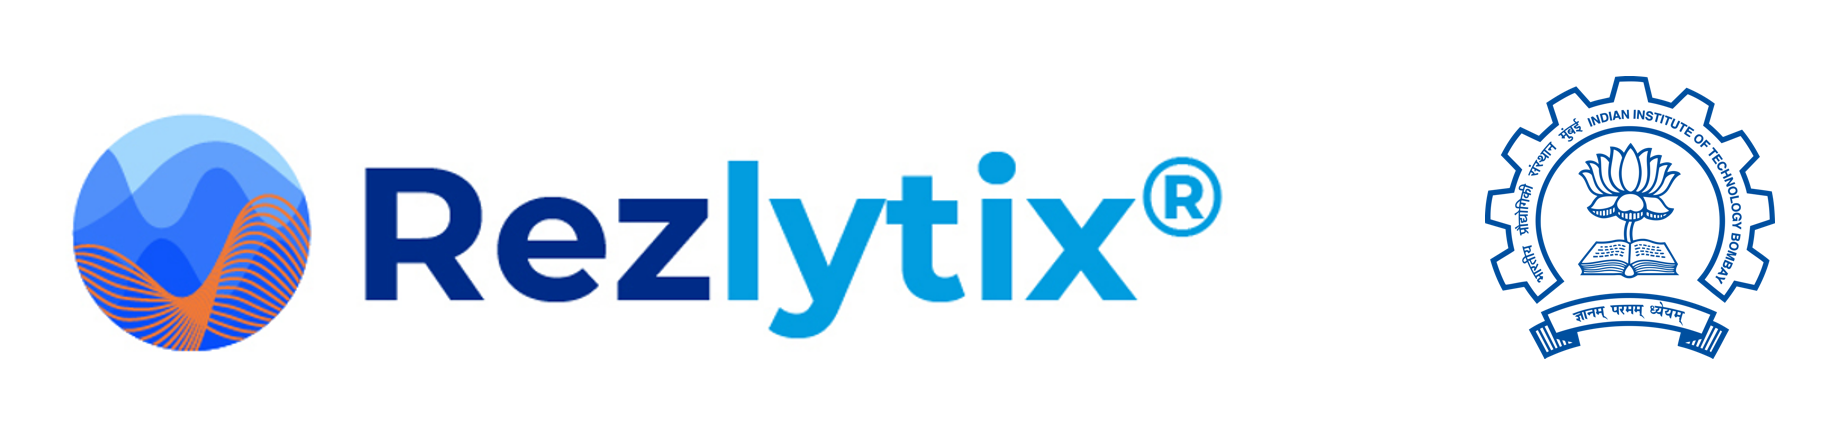

# Xarray & Plotly

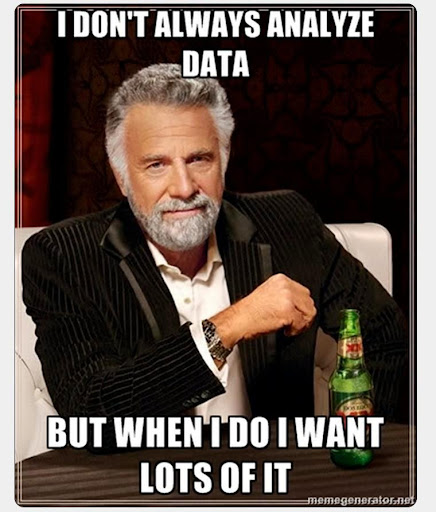


## Numpy arrays on steroids

In [1]:
# Import required libraries
import xarray as xr
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

#### **The Xarray**: A Dimensional container

Numpy arrays lack a meaningful representation of the metadata associated with their data.
Xarray allows us to assign labels in the form of *dimensions, coordinates and attributes* on top of raw NumPy-like multidimensional arrays. This enables a more intuitive, more concise, and less error-prone user experience, when dealing with multi-dimensional data.

Xarray is motivated by weather and climate use cases but is **domain agnostic**

For more in-depth information about the xarray format and its usage, go to https://docs.xarray.dev/en/stable/<br><br>

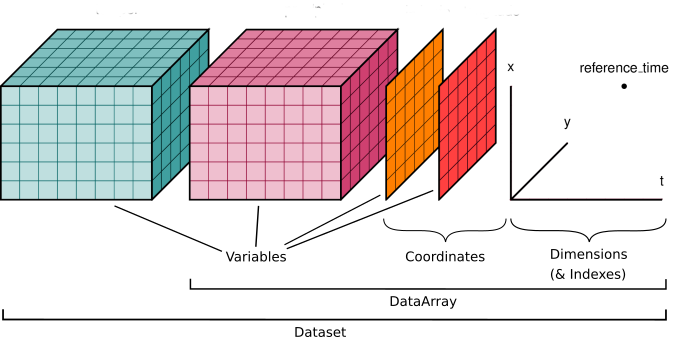

### Loading data from netCDF

- NetCDF (network Common Data Form) is a file format for storing
  multidimensional array data
- NetCDF is a self-describing, meaning that a netCDF file includes information
  about the data it contains, and the necessary metadata such as coordinate
  system used, attributes describing the data, etc...
- NetCDF is used extensively in the geoscience communities
- Xarray's interface is based largely on the netCDF data model

Learn more about netCDF
[here](https://docs.unidata.ucar.edu/netcdf-c/current/faq.html#What-Is-netCDF).


In [2]:
# Loading a netcdf file
ds = xr.open_dataset("./Data/003_e_Xarray_fundamentals_sample_sst.mnmean.nc")

# HTML representation
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [3]:
# netCDF representation
ds.info()

xarray.Dataset {
dimensions:
	lat = 89 ;
	lon = 180 ;
	time = 128 ;

variables:
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:long_name = Latitude ;
		lat:actual_range = [ 88. -88.] ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
		lat:coordinate_defines = center ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [  0. 358.] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
		lon:coordinate_defines = center ;
	datetime64[ns] time(time) ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0000-01-00 00:00:00 ;
		time:prev_avg_period = 0000-00-07 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:actual_range = [19723. 80566.] ;
	float32 sst(time, lat, lon) ;
		sst:long_name = Monthly Means of Sea Surface Temperature ;
		sst:units = degC ;
		sst:var_desc = Sea Surface Temperature ;
		sst:level_desc = Surface ;
		sst:statistic = Mean ;
		sst:dataset = NOAA Extended Reconstr

## Core Data Structures

- xarray has 2 fundamental data structures:

  - `DataArray`, which holds single multi-dimensional variables and its
    coordinates
  - `Dataset`, which holds multiple variables that potentially share the same
    coordinates


### `Dataset`

- Xarray's `Dataset` is a dict-like container of labeled arrays (`DataArrays`)
  with aligned dimensions. - It is designed as an in-memory representation of a
  netCDF dataset.
- In addition to the dict-like interface of the dataset itself, which can be
  used to access any `DataArray` in a `Dataset`. Datasets have the following key
  properties:

| Attribute   | Description                                                                                                                              |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `data_vars` | OrderedDict of `DataArray` objects corresponding to data variables.                                                                      |
| `dims`      | dictionary mapping from dimension names to the fixed length of each dimension (e.g., {`lat`: 6, `lon`: 6, `time`: 8}).                   |
| `coords`    | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) |
| `attrs`     | OrderedDict to hold arbitrary metadata pertaining to the dataset.                                                                        |


In [4]:
# variables in our dataset
ds.data_vars

Data variables:
    sst      (time, lat, lon) float32 ...

In [5]:
# select one variable and pick the first entry along the first axis (time)
ds.sst[0]

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2010-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

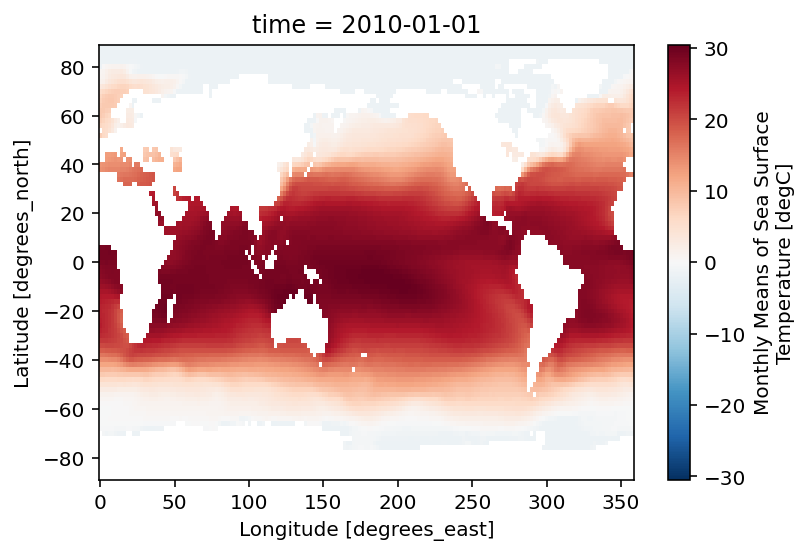

In [6]:
# Plot one timestep
ds.sst[0].plot()

In [7]:
# dataset dimensions
ds.dims

Frozen({'lat': 89, 'lon': 180, 'time': 128})

In [8]:
# dataset coordinates
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

In [9]:
# dataset global attributes
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': -1.0,
 'geospatial_lon_max': 359.0,
 'geospatial_laty_max': 89.0,
 'geospatial_laty_min': -89.0,
 'geospatial_lat_max': 89.0,
 'geospatial_lat_min': -89.0,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_units': 'degrees_east',
 'c

---------

### `DataArray`

The DataArray is xarray's implementation of a labeled, multi-dimensional array.
It has several key properties:

| Attribute | Description                                                                                                                              |
| --------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `data`    | `numpy.ndarray` or `dask.array` holding the array's values.                                                                              |
| `dims`    | dimension names for each axis. For example:(`x`, `y`, `z`) (`lat`, `lon`, `time`).                                                       |
| `coords`  | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) |
| `attrs`   | an `OrderedDict` to hold arbitrary attributes/metadata (such as units)                                                                   |
| `name`    | an arbitrary name of the array                                                                                                           |


In [10]:
# Extract the sst Variable/DataArray
ds["sst"]  # Equivalent to ds.sst

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
[2050560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [11]:
# The actual (numpy) array data
ds.sst.data

array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

In [12]:
# DataArray/Variable dimensions
ds.sst.dims

('time', 'lat', 'lon')

In [13]:
# DataArray/Variable coordinates
ds.sst.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

In [14]:
# DataArray/Variable attributes
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32)}

#### Coordinates, Dimensions, attributes and data

- DataArray objects inside a Dataset may have any number of dimensions but are
  presumed to share a common coordinate system.
- Coordinates can also have any number of dimensions but denote
  constant/independent quantities, unlike the varying/dependent quantities that
  belong in data.
- A dimension is just a name of an axis, like "time".
- Attributes can be used to store metadata, including textual descriptions.


In [15]:
# Obtaining the dimensions
ds.dims

Frozen({'lat': 89, 'lon': 180, 'time': 128})

In [16]:
# Obtaining coordinates
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

In [17]:
# extracting a coordinate variable
ds.sst.lon

<xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0. 358.]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  center

In [18]:
# extracting a coordinate variable from .coords
ds.coords["time"]

<xarray.DataArray 'time' (time: 128)>
array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T0

In [19]:
# Look at global attributes
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': -1.0,
 'geospatial_lon_max': 359.0,
 'geospatial_laty_max': 89.0,
 'geospatial_laty_min': -89.0,
 'geospatial_lat_max': 89.0,
 'geospatial_lat_min': -89.0,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_units': 'degrees_east',
 'c

In [20]:
# Look at variable specific attributes
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32)}

In [21]:
# Set some arbitrary attribute on a data Variable/DataArray
ds.sst.attrs["my_custom_attribute"] = "Foo Bar"
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32),
 'my_custom_attribute': 'Foo Bar'}

## Indexing and Selecting Data


Xarray allows label-based indexing. Scientific data is inherently labeled. For example, time series data includes timestamps that label individual periods or points in time, spatial data has coordinates (e.g. longitude, latitude, elevation), and model or laboratory experiments are often identified by unique identifiers.
<br><br>
Hence, it is significantly more convenient to access data using the labels rather than the numerical indexes, as is necessary for Numpy arrays.

In [22]:
# Indexing by position in Numpy arrays
t = ds["sst"].data  # numpy array

# extract a time-series for one spatial location
t[:, 10, 5]

array([ 7.786831 ,  7.505649 ,  6.7546124,  6.7155957,  7.5147214,
        8.931157 , 11.550815 , 12.668356 , 11.698778 ,  9.821725 ,
        8.031536 ,  7.1925306,  6.9123993,  6.7954493,  6.3712845,
        6.2694106,  7.383598 ,  9.536173 , 11.213239 , 12.044423 ,
       11.425641 ,  9.555154 ,  8.537674 ,  7.7420654,  7.232631 ,
        7.0815945,  6.6443257,  6.650096 ,  7.269591 ,  9.103873 ,
       11.404643 , 12.212099 , 10.904315 ,  9.498382 ,  8.456516 ,
        7.624366 ,  7.4431143,  7.5106306,  6.685736 ,  6.744576 ,
        7.565221 , 10.3550625, 11.592449 , 12.362549 , 11.618427 ,
        9.907261 ,  8.304568 ,  7.9016867,  7.6084547,  7.439275 ,
        6.7932987,  6.825066 ,  7.912713 ,  9.901376 , 12.716297 ,
       13.393567 , 11.99819  , 10.169764 ,  8.906351 ,  8.093182 ,
        7.5498776,  7.2454414,  6.9379916,  6.9599137,  7.577739 ,
        9.399757 , 11.174688 , 12.490612 , 11.854877 , 10.048839 ,
        8.895732 ,  8.058789 ,  7.490308 ,  7.0096817,  6.7750

However, we have no idea what indexes 10 & 5 represent.<br><br>

Xarray offers extremely flexible indexing options that combine the best features of NumPy and pandas for data selection.

In [23]:
da = ds["sst"]  # Extract data array


In [24]:
da[:, 10, 5]

<xarray.DataArray 'sst' (time: 128)>
array([ 7.786831,  7.505649,  6.754612,  6.715596,  7.514721,  8.931157,
       11.550815, 12.668356, 11.698778,  9.821725,  8.031536,  7.192531,
        6.912399,  6.795449,  6.371284,  6.269411,  7.383598,  9.536173,
       11.213239, 12.044423, 11.425641,  9.555154,  8.537674,  7.742065,
        7.232631,  7.081594,  6.644326,  6.650096,  7.269591,  9.103873,
       11.404643, 12.212099, 10.904315,  9.498382,  8.456516,  7.624366,
        7.443114,  7.510631,  6.685736,  6.744576,  7.565221, 10.355062,
       11.592449, 12.362549, 11.618427,  9.907261,  8.304568,  7.901687,
        7.608455,  7.439275,  6.793299,  6.825066,  7.912713,  9.901376,
       12.716297, 13.393567, 11.99819 , 10.169764,  8.906351,  8.093182,
        7.549878,  7.245441,  6.937992,  6.959914,  7.577739,  9.399757,
       11.174688, 12.490612, 11.854877, 10.048839,  8.895732,  8.058789,
        7.490308,  7.009682,  6.775051,  6.607978,  7.766686,  9.603851,
       12.047054, 12.563389, 11.669765, 10.060295,  8.742051,  7.987883,
        7.383832,  7.320846,  6.848582,  6.857948,  7.871924,  9.978762,
       11.939873, 13.21604 , 12.058565, 10.711333,  8.936087,  8.170827,
        7.891901,  7.348945,  6.858466,  6.662112,  8.26459 ,  9.797766,
       11.806659, 13.542888, 12.111798,  9.920067,  9.322421,  8.056617,
        7.918816,  7.546638,  6.609122,  6.604284,  7.429058,  9.326142,
       11.194072, 12.674583, 11.646777,  9.562049,  7.868999,  7.164905,
        7.100774,  6.902882,  6.572453,  6.547485,  7.116683, 10.037747,
       11.839599, 12.880307], dtype=float32)
Coordinates:
    lat      float32 68.0
    lon      float32 10.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:            Monthly Means of Sea Surface Temperature
    units:                degC
    var_desc:             Sea Surface Temperature
    level_desc:           Surface
    statistic:            Mean
    dataset:              NOAA Extended Reconstructed SST V5
    parent_stat:          Individual Values
    actual_range:         [-1.8     42.32636]
    valid_range:          [-1.8 45. ]
    my_custom_attribute:  Foo Bar

**NumPy style indexing still works (but preserves the labels/metadata)**

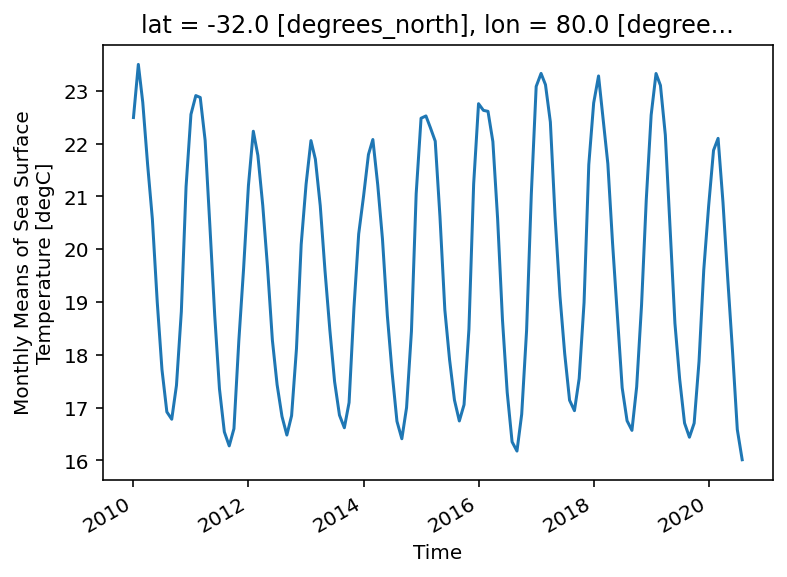

In [25]:
# Positional indexing using dimension names
da.isel(lat=60, lon=40).plot()

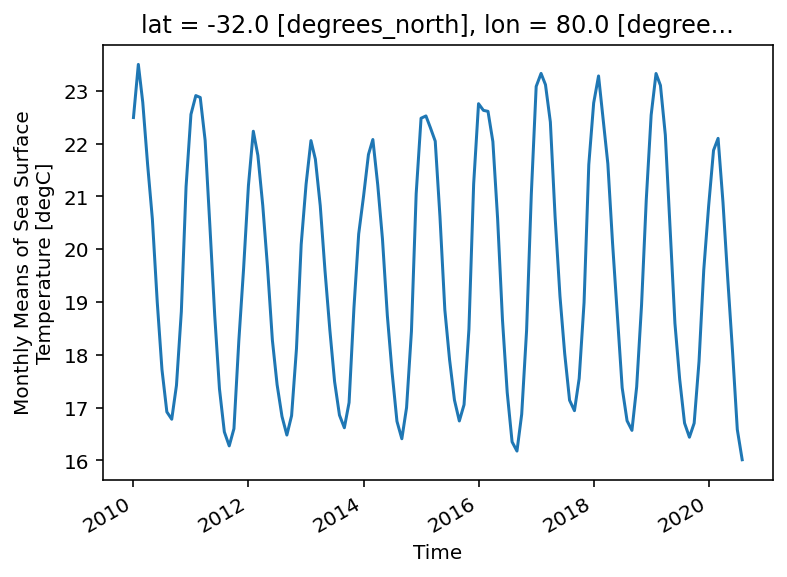

In [26]:
# Label based indexing
da.sel(lat=-32, lon=80).plot()

In [27]:
da.sel(lat=50.0, lon=200.0, time="2020")

<xarray.DataArray 'sst' (time: 8)>
array([ 5.501727,  5.015851,  4.808821,  5.837058,  7.285223,  8.64473 ,
       11.524967, 12.405846], dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-08-01
Attributes:
    long_name:            Monthly Means of Sea Surface Temperature
    units:                degC
    var_desc:             Sea Surface Temperature
    level_desc:           Surface
    statistic:            Mean
    dataset:              NOAA Extended Reconstructed SST V5
    parent_stat:          Individual Values
    actual_range:         [-1.8     42.32636]
    valid_range:          [-1.8 45. ]
    my_custom_attribute:  Foo Bar

In [28]:
# Slicing xarray between a range
ds.sel(time=slice("2019-05", "2020-07"))

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 15)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2019-05-01 2019-06-01 ... 2020-07-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [29]:
# Nearest neighbour lookup
da.sel(lat=52.25, lon=199.8998, method="nearest")

<xarray.DataArray 'sst' (time: 128)>
array([ 4.705644,  4.235652,  3.786816,  3.894467,  5.025549,  6.722405,
        8.802956, 10.88214 , 11.343729,  8.617235,  6.347388,  5.132935,
        4.002445,  3.945421,  4.032197,  4.322491,  5.063121,  6.695671,
        9.228583, 11.372272, 10.336393,  8.822723,  6.687542,  5.191285,
        3.966594,  3.369164,  2.957632,  3.534109,  4.380636,  6.388795,
        8.575526, 10.373878, 10.047636,  8.43953 ,  6.500867,  4.893016,
        4.141182,  4.075954,  3.838745,  4.232625,  5.292315,  7.709694,
       10.310976, 12.005109, 11.18946 ,  9.176464,  7.565617,  6.473842,
        5.47137 ,  4.866634,  4.59714 ,  5.080152,  6.643094,  8.654615,
       11.421213, 13.093707, 12.912114, 10.146241,  7.678334,  6.49006 ,
        5.666105,  4.994374,  5.057583,  5.201408,  6.177088,  8.500494,
       10.454483, 12.559707, 12.274053, 10.332552,  7.810973,  6.093195,
        5.29749 ,  4.918661,  4.639481,  5.114538,  6.478955,  8.673688,
       11.297427, 13.17239 , 13.008541, 10.69529 ,  7.610532,  5.791649,
        4.898663,  4.299755,  4.133677,  4.585153,  5.829455,  7.973777,
       10.351132, 12.096955, 10.950939,  9.527518,  7.551981,  5.705954,
        5.145298,  4.731611,  4.597766,  4.952187,  5.744795,  7.3951  ,
        9.797625, 11.392721, 12.181681, 10.654009,  8.514215,  6.395074,
        5.224188,  5.145409,  4.995797,  5.308442,  6.638938,  8.921215,
       11.567537, 13.788342, 13.246027, 10.758543,  8.740679,  6.882786,
        4.980844,  4.375096,  4.191996,  4.998106,  6.778876,  8.710817,
       11.243944, 12.232312], dtype=float32)
Coordinates:
    lat      float32 52.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:            Monthly Means of Sea Surface Temperature
    units:                degC
    var_desc:             Sea Surface Temperature
    level_desc:           Surface
    statistic:            Mean
    dataset:              NOAA Extended Reconstructed SST V5
    parent_stat:          Individual Values
    actual_range:         [-1.8     42.32636]
    valid_range:          [-1.8 45. ]
    my_custom_attribute:  Foo Bar

**All of these indexing methods work on the dataset as well.**

### Vectorized Indexing

In [30]:
# generate a coordinates for a transect of points
lat_points = xr.DataArray([60, 80, 90], dims="points")
lon_points = xr.DataArray([250, 250, 250], dims="points")
lat_points

<xarray.DataArray (points: 3)>
array([60, 80, 90])
Dimensions without coordinates: points

In [31]:
lon_points

<xarray.DataArray (points: 3)>
array([250, 250, 250])
Dimensions without coordinates: points

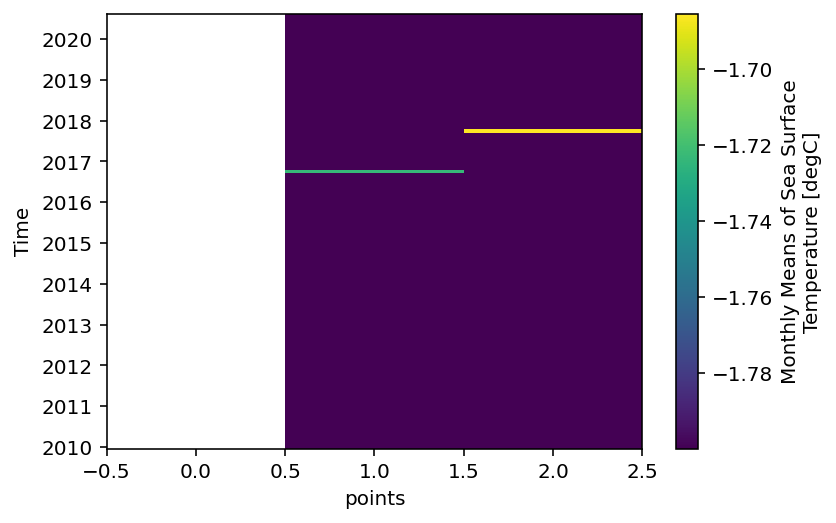

In [32]:
# nearest neighbor selection along the transect
da.sel(lat=lat_points, lon=lon_points, method="nearest").plot()

## Indexing with `where()`

In [34]:
# Replacing the missing values (nan) with some placeholder
da2 = ds.sst.where(ds.sst.notnull(), -99)

## Arithmetic Operations

Xarray supports many of the aggregations methods that numpy has. A partial list includes: all, any, argmax, argmin, max, mean, median, min, prod, sum, std, var.

While the numpy syntax would require scalar axes, xarray can use dimension name.

In [35]:
da_mean = da.mean(dim="time")
da_mean

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7965822, -1.7966435, -1.7966874, ..., -1.7976037, -1.796984 ,
        -1.7965525],
       [-1.7968166, -1.7963768, -1.796082 , ..., -1.7992076, -1.7980535,
        -1.7973973],
       [-1.7999136, -1.798993 , -1.7984267, ..., -1.7992468, -1.7995085,
        -1.7997851],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

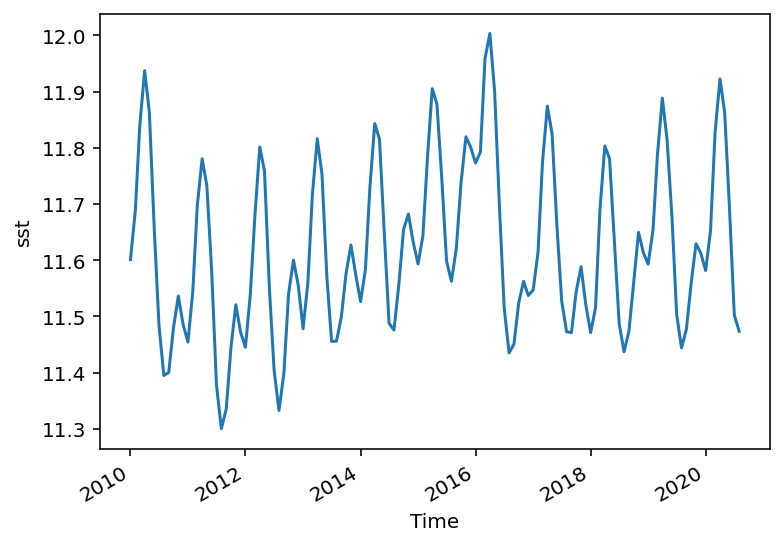

In [36]:
da.std(dim=["lat", "lon"]).plot()

### Broadcasting:

**Broadcasting** allows an operator or a function to act on two or more arrays
to operate even if these arrays do not have the same shape. That said, not all
the dimensions can be subjected to broadcasting; they must meet certain rules.
The image below illustrates how performing an operation on arrays with
differently coordinates will result in automatic broadcasting

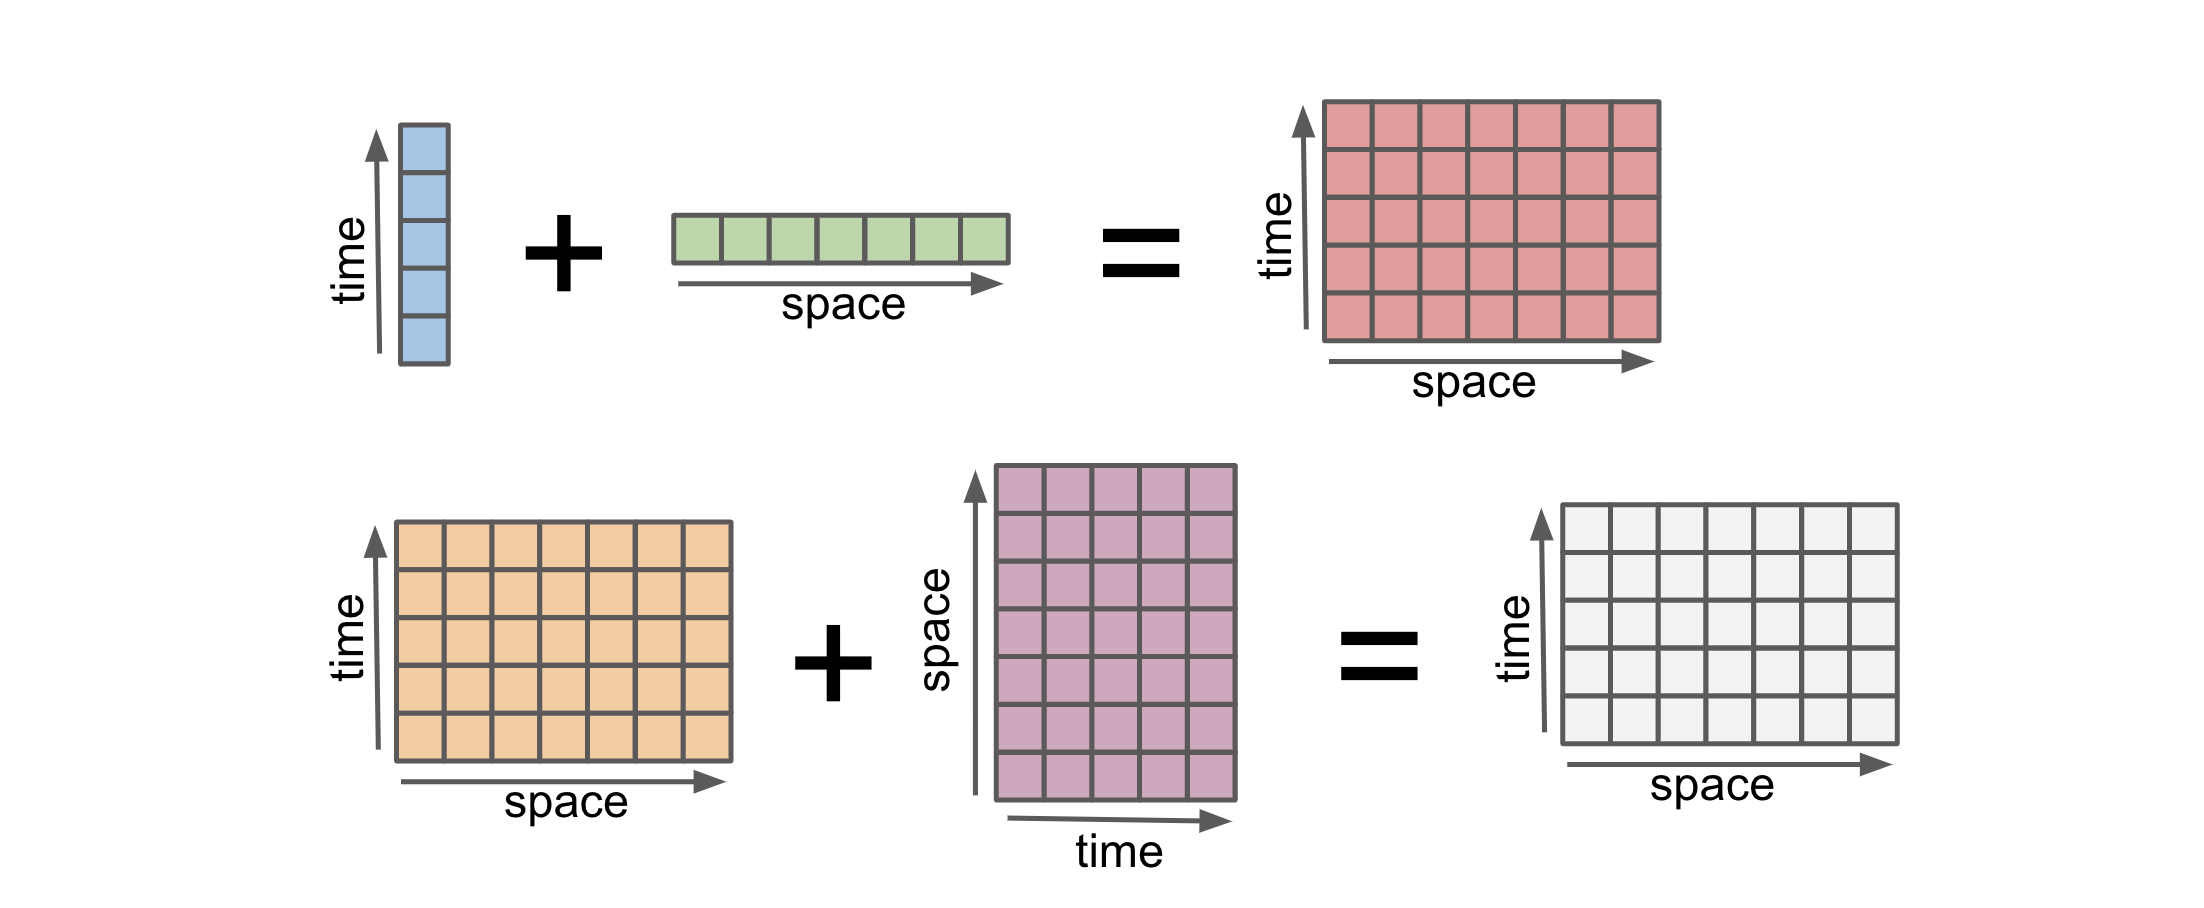

In [37]:
da.shape, da.dims

((128, 89, 180), ('time', 'lat', 'lon'))

In [38]:
da_mean.shape, da_mean.dims

((89, 180), ('lat', 'lon'))

In [39]:
# Subtract the mean (2D array) from the original array (3D array)
x = da - da_mean
x

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

### High level computation: groupby, resample, rolling, coarsen, weighted

Xarray has some very useful high level objects that let you do common computations:

- [`groupby`](https://docs.xarray.dev/en/stable/groupby.html):
  Bin data in to groups and reduce
- [`resample`](https://docs.xarray.dev/en/stable/user-guide/time-series.html#resampling-and-grouped-operations):
  Groupby specialized for time axes. Either downsample or upsample your data.
- [`rolling`](https://docs.xarray.dev/en/stable/user-guide/computation.html#rolling-window-operations):
  Operate on rolling windows of your data e.g. running mean
- [`coarsen`](https://docs.xarray.dev/en/stable/user-guide/computation.html#coarsen-large-arrays):
  Downsample your data
- [`weighted`](https://docs.xarray.dev/en/stable/user-guide/computation.html#weighted-array-reductions):
  Weight your data before applying reductions


#### groupby

In [40]:
# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [41]:
# day of the week groups
ds.groupby("time.dayofweek")

DatasetGroupBy, grouped over 'dayofweek'
7 groups with labels 0, 1, 2, 3, 4, 5, 6.

In [42]:
# compute a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.799 -1.799 -1.8 -1.8 ... nan nan nan

In [43]:
# The seasons are not in order (they are alphabetically sorted). This is a common annoyance. The solution is to use .reindex
seasonal_mean = seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (season: 4, lat: 89, lon: 180)
Coordinates:
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    sst      (season, lat, lon) float32 -1.799 -1.799 -1.8 -1.8 ... nan nan nan

#### resample

In [47]:
# resample to bi-monthly frequency
ds.sst.resample(time="2MS").mean()

<xarray.DataArray 'sst' (time: 64, lat: 89, lon: 180)>
array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-03-01 ... 2020-07-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [48]:
da2.resample(time="2MS").mean()

<xarray.DataArray 'sst' (time: 64, lat: 89, lon: 180)>
array([[[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
...
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-03-01 ... 2020-07-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

#### rolling window operations


In [49]:
# A rolling mean with a window size of 7
ds.sst.rolling(time=7).mean()

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.80000005, -1.80000005, -1.80000005, ..., -1.80000005,
         -1.80000005, -1.80000005],
        [-1.80000005, -1.80000005, -1.80000005, ..., -1.80000005,
         -1.80000005, -1.80000005],
        [-1.80000005, -1.80000005, -1.80000005, ..., -1.80000005,
         -1.80000005, -1.80000005],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:            Monthly Means of Sea Surface Temperature
    units:                degC
    var_desc:             Sea Surface Temperature
    level_desc:           Surface
    statistic:            Mean
    dataset:              NOAA Extended Reconstructed SST V5
    parent_stat:          Individual Values
    actual_range:         [-1.8     42.32636]
    valid_range:          [-1.8 45. ]
    my_custom_attribute:  Foo Bar

### Storing Data on Disk

What do we need to store?



*   Data Variable (Nd float array)
*   Meta Data
*   Relationships (SQL like)
* Textual attribues



##### [The HDF5 format](https://www.hdfgroup.org/solutions/hdf5/)

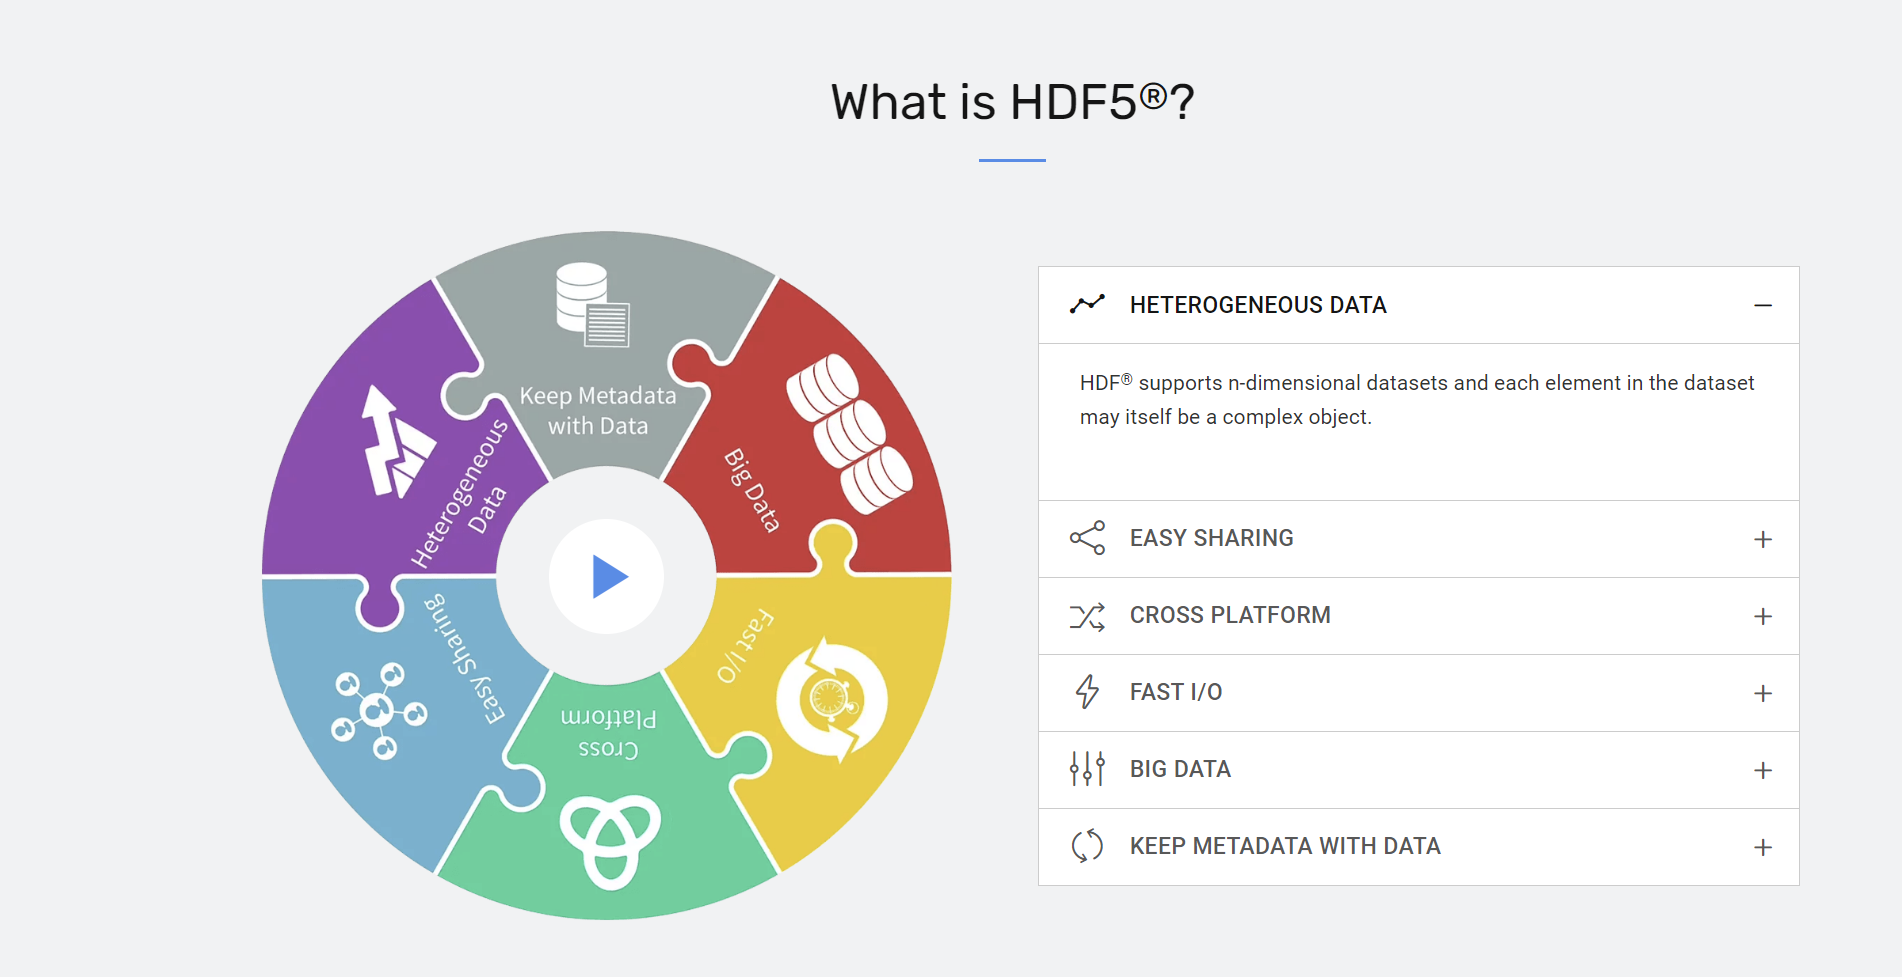

##### [The NetCDF Format](https://www.unidata.ucar.edu/software/netcdf/)

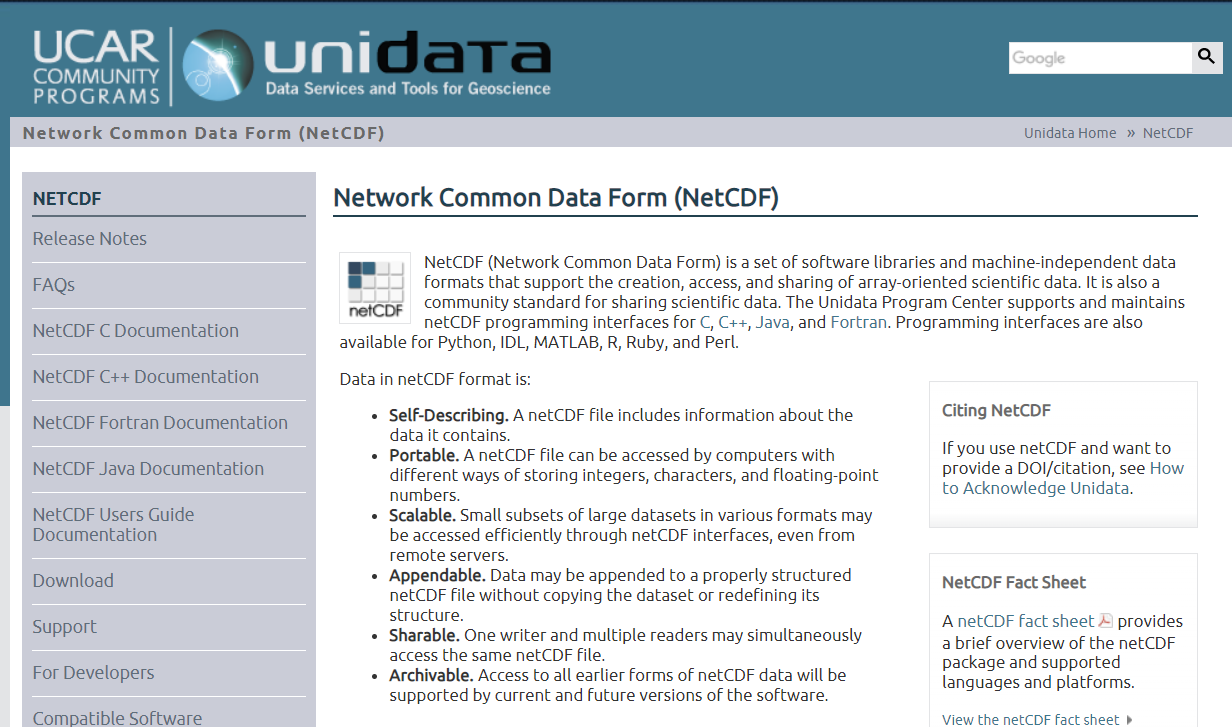

#### Writing an xarray to disk -> creating NetCDF

In [50]:
ds2 = ds.where(ds.notnull(), -99)

In [51]:
ds2

<xarray.Dataset>
Dimensions:  (time: 128, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... -99.0 -99.0 -99.0
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [52]:
# xarray output
ds2.to_netcdf("./Data/test.nc")

####  Plenty of other stuff

In [53]:
# Interchange with pandas
ds2.to_dataframe()

sst
time       lat   lon        
2010-01-01  88.0 0.0    -1.8
                 2.0    -1.8
                 4.0    -1.8
                 6.0    -1.8
                 8.0    -1.8
...                      ...
2020-08-01 -88.0 350.0 -99.0
                 352.0 -99.0
                 354.0 -99.0
                 356.0 -99.0
                 358.0 -99.0

[2050560 rows x 1 columns]

## [Plotly](https://plotly.com/python/)

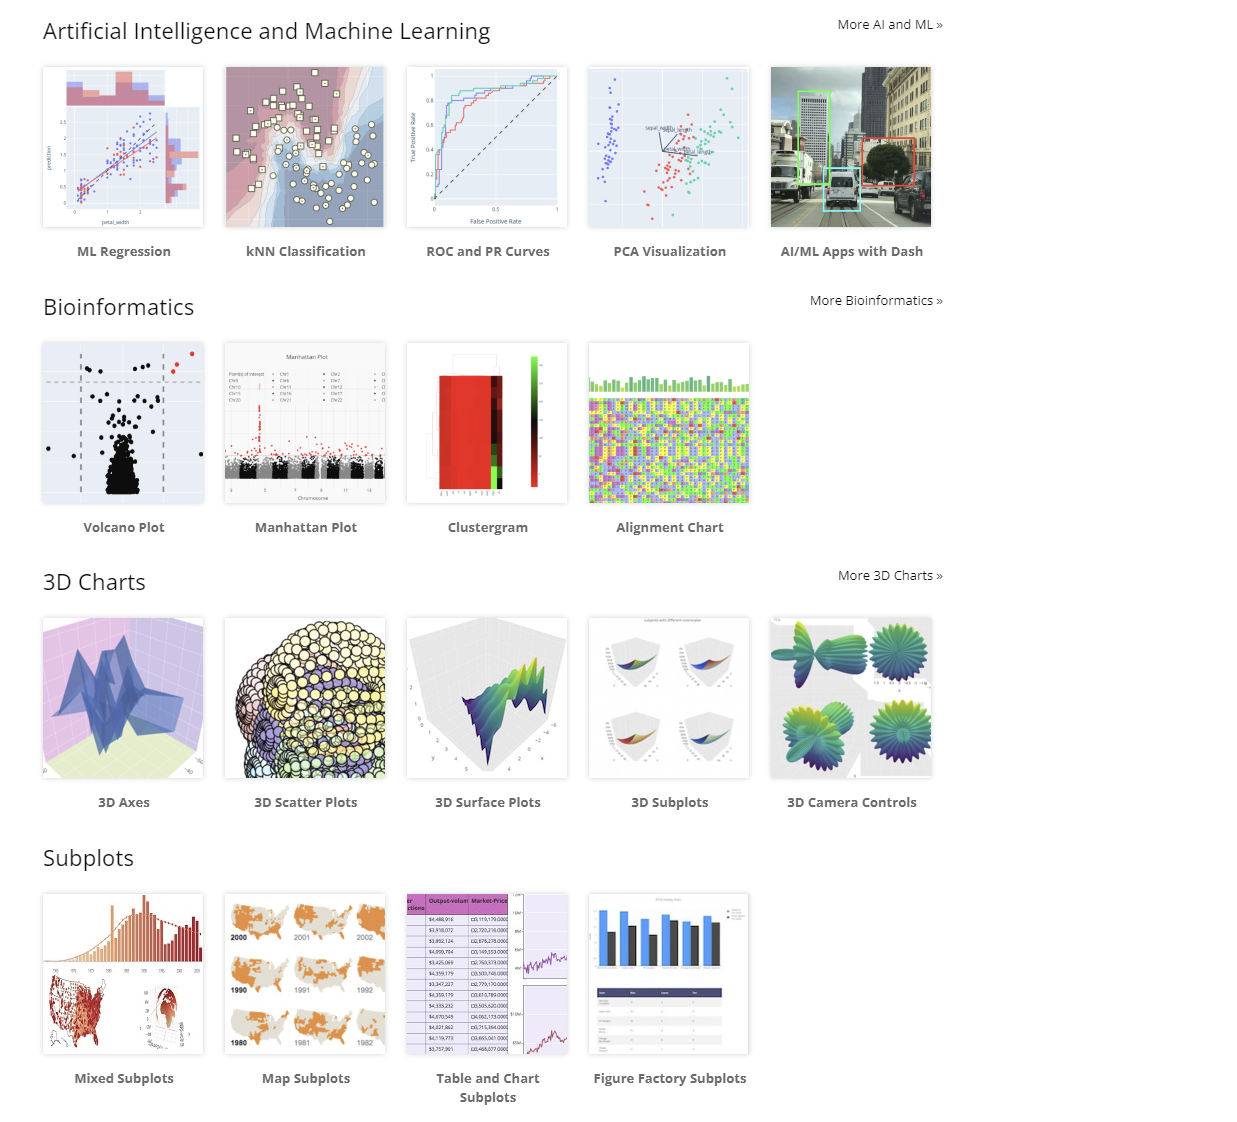

In [54]:
import plotly.express as px
import plotly.graph_objects as go

In [64]:
# plot xarray data as line
px.line(ds2.sst.sel(lon=200, lat = 40))

In [67]:
# plot xarray data as image
px.imshow(ds2.sst.sel(time='2010-01-01'))